

# Project: Investigate a Dataset (Soccer Dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### pydbhub is a library in Python to access and use SQLite databases

In [1]:
!pip install pydbhub

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling


### General Properties

### We will use only 4 tables in this database (Player, Player_attributes, Team, Team_atrributes)

### 1-Read Player table

In [3]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
player_dataset = pd.read_sql_query("SELECT * from Player", con)
player_dataset.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
player_dataset.shape

(11060, 7)

### the player dataset seems to have 7 features on it 

### 2-Read Player_Attributes table

In [5]:
player_attributes_dataset = pd.read_sql_query("SELECT * from Player_Attributes", con)
player_attributes_dataset.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
player_attributes_dataset.shape

(183978, 42)

### the player attributes dataset seems to have 42 features on it 

### 3-Read Team table

In [7]:
team_dataset = pd.read_sql_query("SELECT * from Team", con)
team_dataset.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
team_dataset.shape

(299, 5)

### the team dataset seems to have 5 features on it 

### 4-Read Team_Attributes table

In [9]:
team_attributes_dataset = pd.read_sql_query("SELECT * from Team_Attributes", con)
team_attributes_dataset.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [10]:
team_attributes_dataset.shape

(1458, 25)

### the team attributes dataset seems to have 25 features on it 



### Data Cleaning (Replace this with more specific notes!)

In [11]:
player_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


### it seems that player dataset does not have any NaN values

In [12]:
player_attributes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

### it seems that all features in player_attributes_dataset contain Nan values except the following features(id, player_fifa_id, player_api_id, date) 

In [13]:
player_attributes_dataset.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [14]:
team_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


### it seems that team dataset contains Nan values in team_fifa_api_id 

In [15]:
team_attributes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

## it seems that the NaN values in team attributes dataset are in buildUpPlayDribbling

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
player_attributes_dataset.dropna(inplace=True)

### I dropped all the rows in player attributes dataset that contains NaN values

In [17]:
team_dataset.dropna(inplace=True)

### I dropped all the rows in team dataset that contains NaN values

In [18]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
team_attributes_dataset['buildUpPlayDribbling'].fillna(team_attributes_dataset['buildUpPlayDribbling'].mean(), inplace=True)

### I fill the NaN values in buildUpPlayerDribbling with the mean value in this column

### Next few line is for checking the duplicated rows in each dataset

In [19]:
sum(player_dataset.duplicated())

0

In [20]:
sum(player_attributes_dataset.duplicated())

0

In [21]:
sum(team_dataset.duplicated())

0

In [22]:
sum(team_attributes_dataset.duplicated())

0

### it seems that there are no duplicates rows in the dataset

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What player attributes lead to the most rating?!)

In [23]:
player_attributes_dataset.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

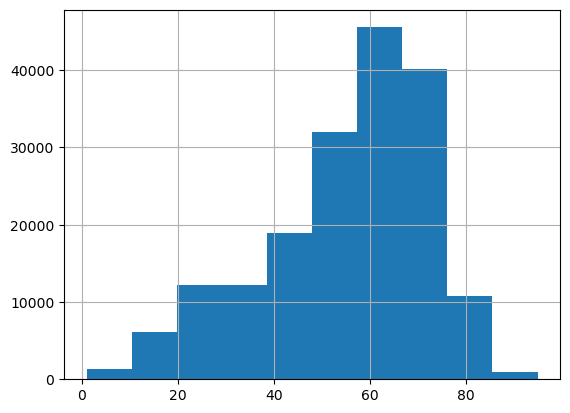

In [32]:
player_attributes_dataset['crossing'].hist();

### it seems that crossing attributes left skewed

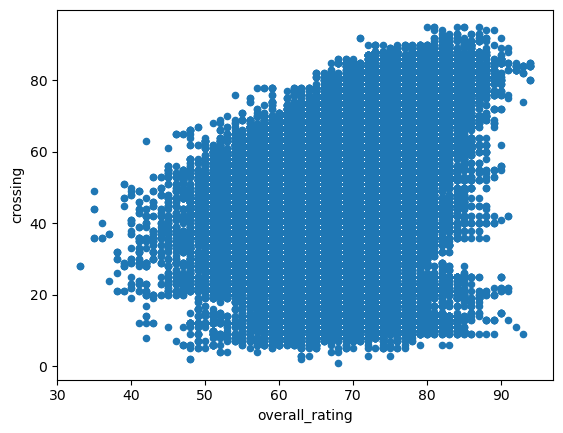

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
player_attributes_dataset.plot(x="overall_rating", y="crossing", kind="scatter");

### it seems that the more of the accuracy of the crossing , the more of the overall rating of the player

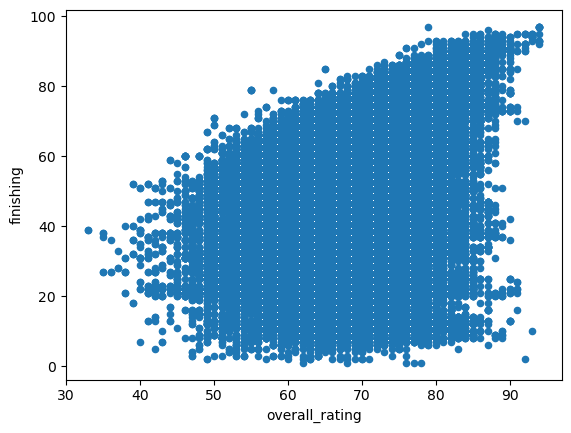

In [25]:
player_attributes_dataset.plot(x="overall_rating", y="finishing", kind="scatter");

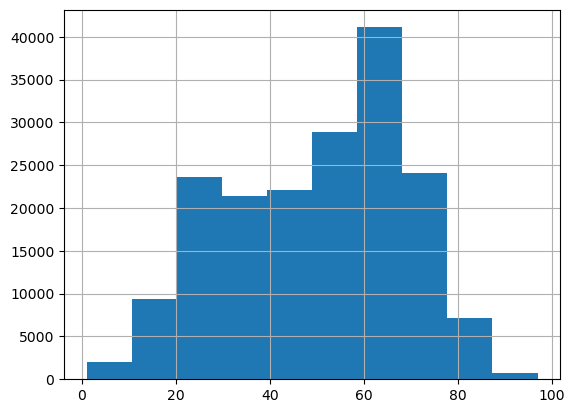

In [34]:
player_attributes_dataset['finishing'].hist();

### it seems that finishing attribute close to left skewed

### it seems that the more of the accuracy of the finishing , the more of the overall rating of the player

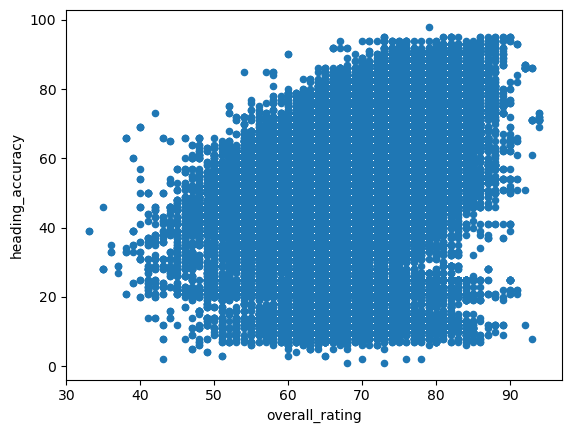

In [26]:
player_attributes_dataset.plot(x="overall_rating", y="heading_accuracy", kind="scatter");

### it seems that the more of the accuracy of the heading accuracy , the more of the overall rating of the player

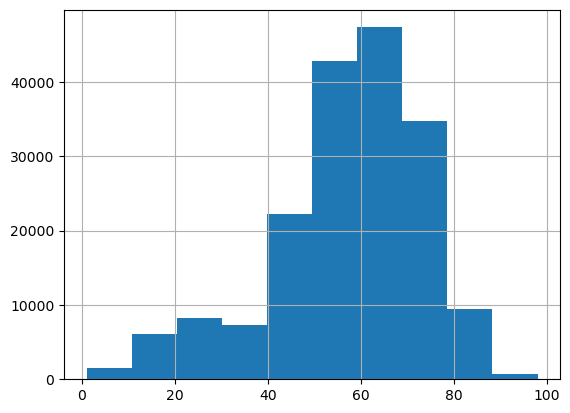

In [36]:
player_attributes_dataset['heading_accuracy'].hist();

### it seems that heading_accuracy attribute close to left skewed

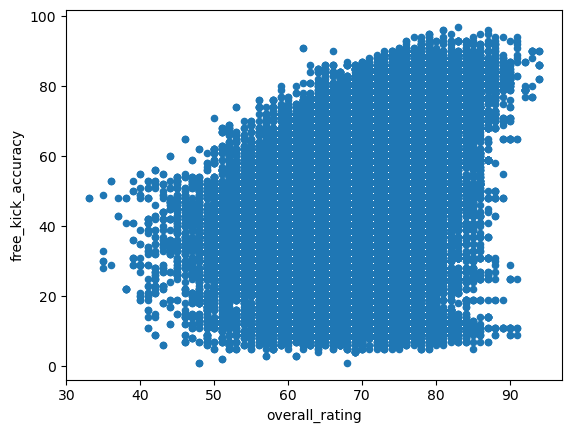

In [27]:
player_attributes_dataset.plot(x="overall_rating", y="free_kick_accuracy", kind="scatter");

### it seems that the more of the accuracy of the free-kick accuracy , the more of the overall rating of the player

<AxesSubplot:>

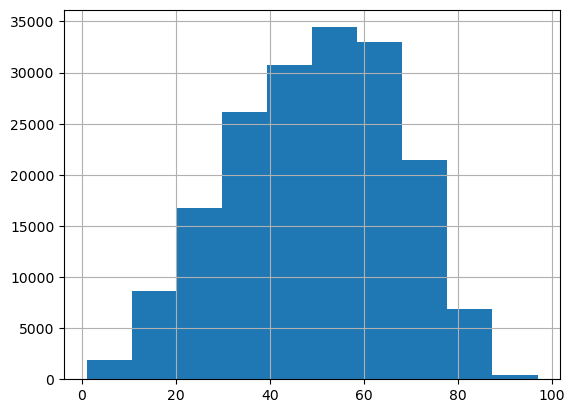

In [37]:
player_attributes_dataset['free_kick_accuracy'].hist()

### it seems that free_kick_accuracy attribute close to symmetry

### Research Question 2  (Which players had the most penalties?!)

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
player_attributes_dataset[player_attributes_dataset['penalties'] == player_attributes_dataset['penalties'].max()]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
149591,149592,13879,39225,2016-03-10 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149592,149593,13879,39225,2015-12-24 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149593,149594,13879,39225,2015-10-23 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149594,149595,13879,39225,2015-09-21 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0


### Here we get the dataset that contains the maximum penalties scored and get its player id

In [30]:
player_dataset[player_dataset['player_api_id'] == 39225]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
8967,8981,39225,Rickie Lambert,13879,1982-02-16 00:00:00,187.96,170


### it seems that Rickie Lambert scored the maximum penalties

<a id='conclusions'></a>
## Conclusions

### it seems that the most attributes that affect the overall rating of one player are (free_kick_accuracy , heading_accuracy, finishing, crossing)